# Book Recommender System 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
books=pd.read_csv('Books.csv')
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

C:\Users\chaud\AppData\Local\Temp\ipykernel_12296\775865190.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [3]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(users.shape)
print(books.shape)
print(ratings.shape)

(278858, 3)
(271360, 8)
(1149780, 3)


## The dataset is quite large with approx 2.78 lakhs users,2.71 lakhs books and 11.49 lakhs ratings

## Now we will check missing values  

In [7]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

## As we can see there are almost 50% age values are missing but the approach we are using does not involve the use of age of users

In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

### Almost all the values are there so nothing to be worried about

In [9]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Checking for duplicate values in our data

In [10]:
books.duplicated().sum()

0

In [11]:
ratings.duplicated().sum()

0

In [12]:
users.duplicated().sum()

0

## Performing Exploratory Data Analysis(EDA)

In [13]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

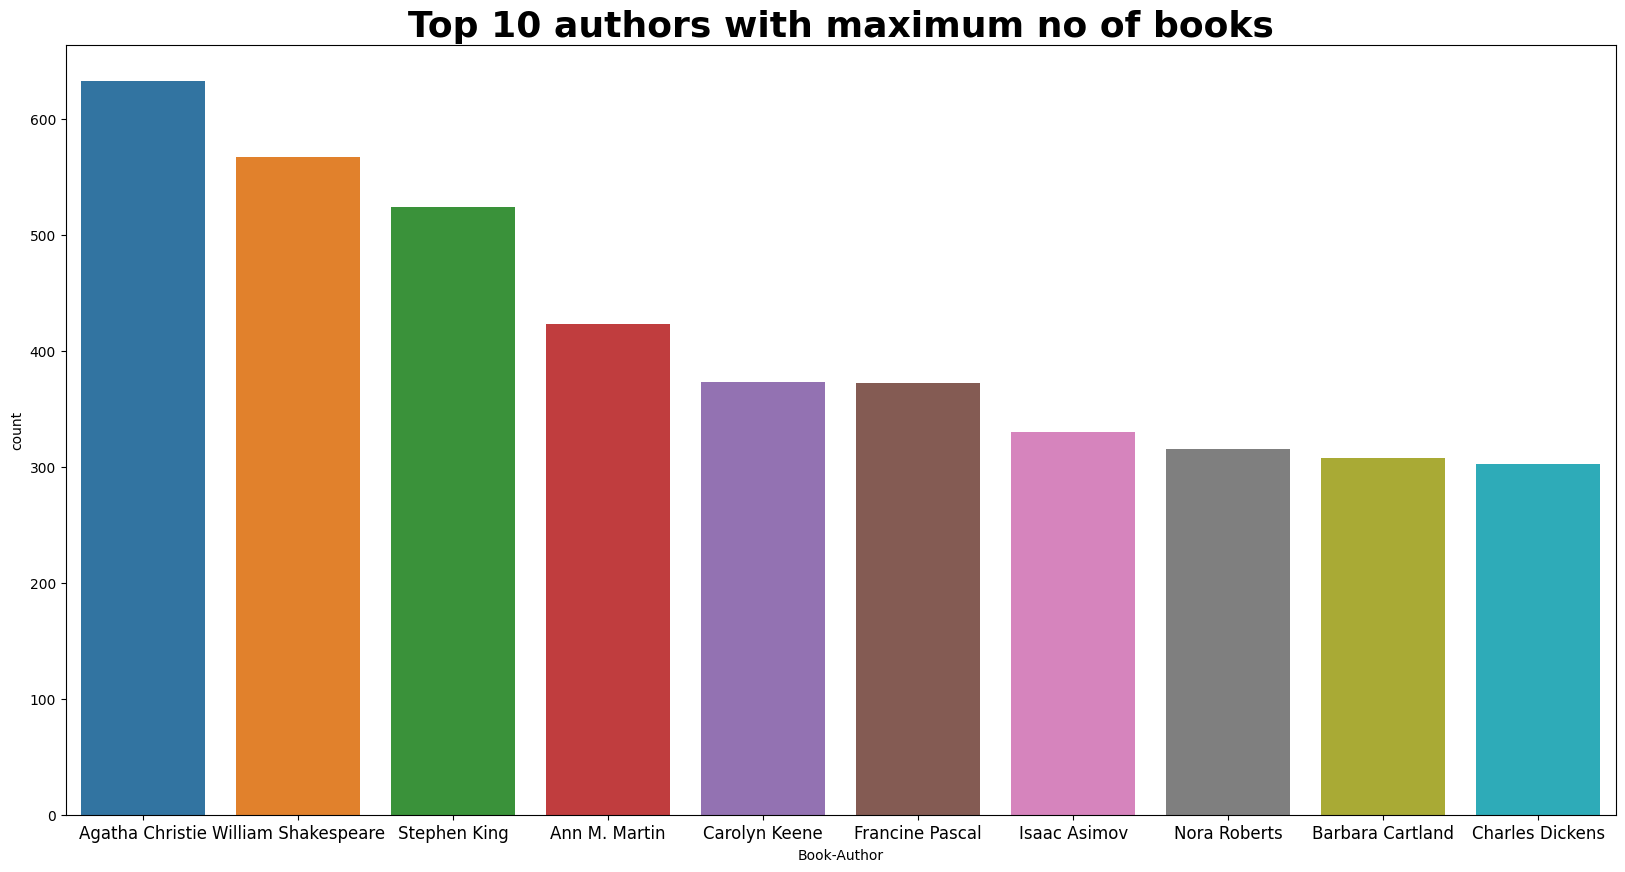

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='Book-Author',data=books,order=books['Book-Author'].value_counts().iloc[:10].index)
plt.title("Top 10 authors with maximum no of books",fontsize=26,fontweight='bold')
plt.xticks(fontsize=12)
plt.show()

### Finding most occuring book

In [15]:
book=books['Book-Title'].value_counts()[:20]
book.head()

Book-Title
Selected Poems       27
Little Women         24
Wuthering Heights    21
The Secret Garden    20
Dracula              20
Name: count, dtype: int64

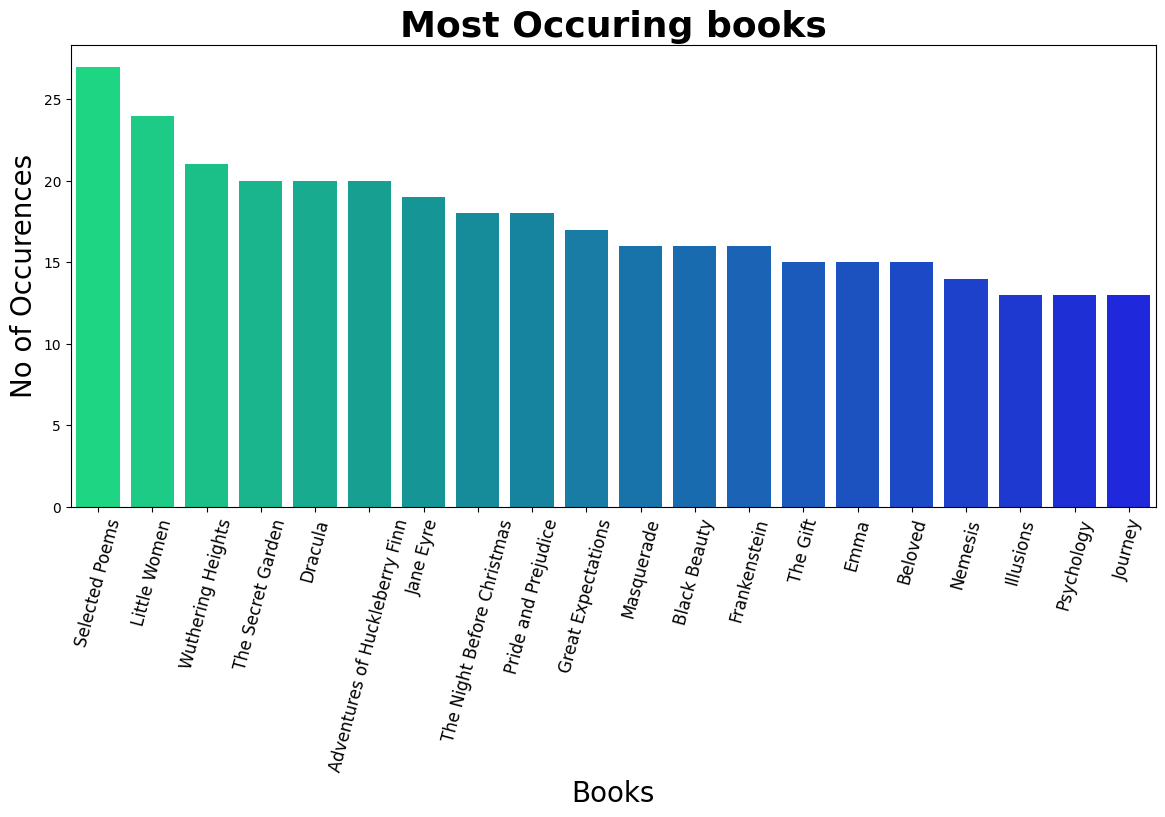

In [16]:
plt.figure(figsize=(14,6))
sns.barplot(x=book.index,y=book,palette='winter_r')
plt.title("Most Occuring books",fontsize=26,fontweight='bold')
plt.ylabel("No of Occurences",fontsize=20)
plt.xticks(rotation = 75,fontsize=12)
plt.xlabel("Books",fontsize=20)
plt.show()

In [17]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [18]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [19]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

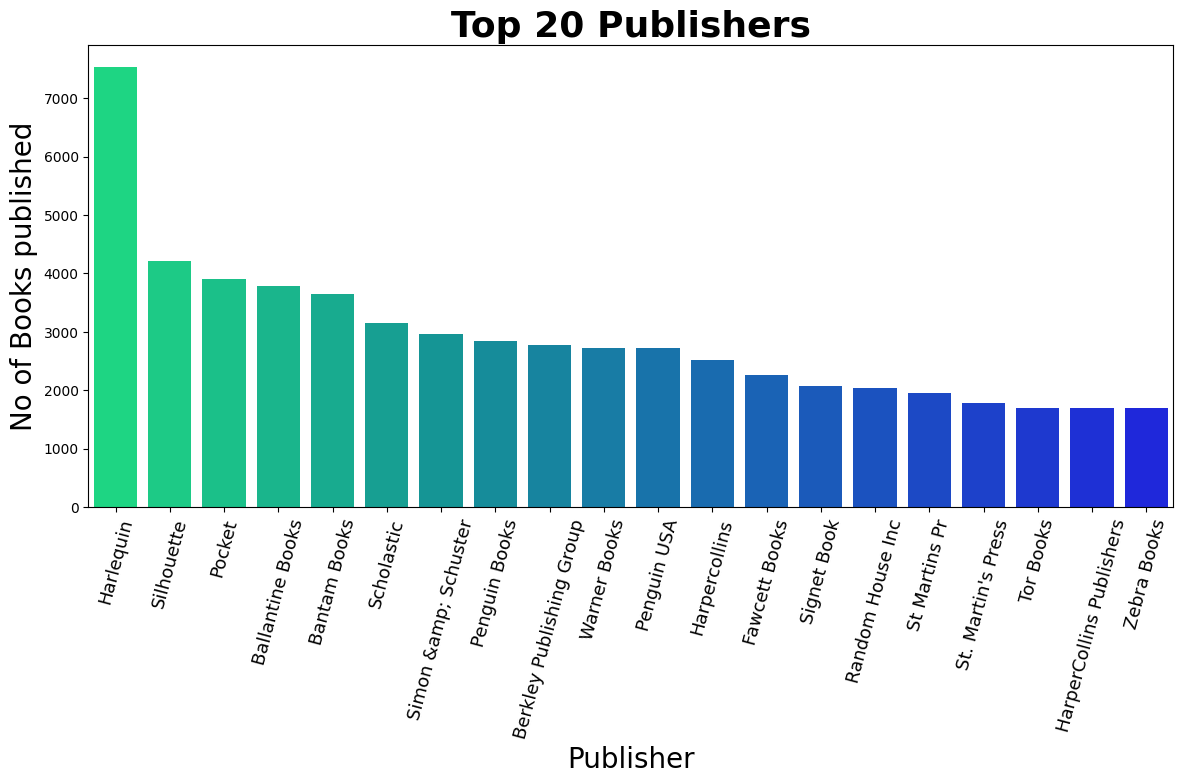

In [20]:
publisher=books['Publisher'].value_counts()[:20]
plt.figure(figsize=(14,6))
sns.barplot(x=publisher.index,y=publisher,palette='winter_r')
plt.title("Top 20 Publishers",fontsize=26,fontweight='bold')
plt.xlabel("Publisher",fontsize=20)
plt.ylabel("No of Books published",fontsize=20)
plt.xticks(rotation =75,fontsize=13)
plt.show()

## Popularity Based Recommender System

In [21]:
ratings_with_name1=ratings.merge(books,on="ISBN")
ratings_with_name = ratings_with_name1[ratings_with_name1['Book-Rating'] != 0]

In [22]:
num_ratings_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_ratings_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135563,Ã?Â?rger mit Produkt X. Roman.,3
135564,Ã?Â?sterlich leben.,1
135565,Ã?Â?stlich der Berge.,1


In [23]:
avg_ratings_df=ratings_with_name.groupby('Book-Title',as_index=False)['Book-Rating'].mean()
avg_ratings_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_ratings_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,7.000000
135564,Ã?Â?sterlich leben.,7.000000
135565,Ã?Â?stlich der Berge.,8.000000


In [24]:
popular_df=num_ratings_df.merge(avg_ratings_df,on="Book-Title")
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


### Now I want to use those books only whose no of ratings are >=100

In [25]:
popular_df=popular_df[popular_df['num_ratings']>=100]
popular_df=popular_df.sort_values('avg_rating',ascending=False).head(50)

In [26]:
popular_df=popular_df.merge(books,on="Book-Title").drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','avg_rating','num_ratings']]

In [75]:
popular_df

,Book-Title,Book-Author,Image-URL-M,avg_rating,num_ratings
0,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,9.330882,136
11,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339738.0...,9.213592,103
21,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,9.125506,247
23,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,9.062500,176
27,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,9.047393,211
31,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,9.043321,277
34,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,8.977528,267
42,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,8.936508,315
44,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,http://images.amazon.com/images/P/0312853238.0...,8.920530,151
48,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,8.882927,205


## Collaborative Filtering Based Recommender System

#### Considering only those users who have given ratings to atleast 50 books

In [28]:
x=ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 50
good_users=x[x].index

In [29]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(good_users)]

#### And also considering those books which has received atleast 10 ratings

In [30]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=10
famous_books=y[y].index

In [31]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

### Creating a pivot table with users as columns and Book names as rows

In [35]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [36]:
pt.fillna(0,inplace=True)

In [37]:
pt

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,274004,274061,274111,274301,275970,276680,277427,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2061: Odyssey Three,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,9.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong to Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yukon Ho!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

#### This stores the similarity score among all books 

In [72]:
similarity_scores=cosine_similarity(pt)
similarity_scores.shape

(1697, 1697)

In [76]:
def recommend(book_name):
    #fetching index for the book
    index=np.where(pt.index == book_name)[0][0]
    #fetching the indices of the 10 books which are most related with the given book(based on similarity score)
    similar_items=sorted(list(enumerate(similarity_scores[index])),key = lambda x:x[1],reverse=True)[1:11]
    data=[]
    for i in similar_items:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)
    return data


## Checking my recommender Stsyem

In [67]:
recommend('1984')

Animal Farm
Brave New World
The Handmaid's Tale
The Catcher in the Rye
Lying Awake
A Portrait of the Artist As a Young Man
The Alchemist: A Fable About Following Your Dream
Waiting
Roll of Thunder, Hear My Cry
Naked


In [68]:
recommend('Message in a Bottle')

A Walk to Remember
Nights in Rodanthe
Chicken Soup for the Christian Soul (Chicken Soup for the Soul Series (Paper))
The Mulberry Tree
The Rescue
The Notebook
Sanctuary
River's End
Book Club
I Know Why the Caged Bird Sings


In [69]:
recommend('The Notebook')

Nights in Rodanthe
A Walk to Remember
The Rescue
The Five People You Meet in Heaven
Suzanne's Diary for Nicholas
Book Club
Message in a Bottle
One Door Away from Heaven
While I Was Gone
The Ranch


In [70]:
recommend('The Hobbit : The Enchanting Prelude to The Lord of the Rings')

The Two Towers (The Lord of the Rings, Part 2)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Return of the King (The Lord of the Rings, Part 3)
The Renegades of Pern (Dragonriders of Pern (Paperback))
Stuart Little
Where the Red Fern Grows
The English Patient
Lord of the Flies
One for the Money (A Stephanie Plum Novel)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


In [71]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Charlotte's Web (Trophy Newbery)
The Shelters of Stone (Earth's Children Series, No 5)
Bridget Jones's Diary
The Hobbit: or There and Back Again


## Exporting my files

In [73]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [78]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))